### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [5]:
data.shape # There are 12684 in this file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

### After examining the data it seems like the car attribute has most of the data missing we will drop this column. There are a few attributes that are also not fully populated so we will replace these with unknon value.

In [78]:
df_cleaned = data.drop('car', axis= 1)
df_cleaned = df_cleaned.fillna({"Bar": "unknown", "CoffeeHouse": "unknown", "CarryAway": "unkonwn", "RestaurantLessThan20": "unknown","Restaurant20To50":"unknown"})
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

### Exploring the features and trying to plot the columns

In [79]:
fig = px.histogram(df_cleaned, x = 'gender')
fig.update_traces(marker_color = 'lightsalmon',
                   marker_line_width = 2, opacity = 1)
fig.show()

## We can see from the plot above that the poluation as almost 50/50 distribution bettween males and females.

In [106]:
fig = px.histogram(df_cleaned, x = 'age')
fig.update_traces(marker_color = 'mediumvioletred',
                   marker_line_width = 2, opacity = 1)
fig.show()

## let us rename the 50plus and below 21 with 50 and  21 for better reading clarily of the data and we can see a sorted age on x axis. 

In [117]:
df_cleaned['age'] = df_cleaned['age'].replace('>50','50')
df_cleaned['age'] = df_cleaned['age'].replace('<21','20')

fig = px.histogram(df_cleaned, x = 'age')
fig.update_traces(marker_color = 'mediumvioletred',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='category ascending')
fig.show()

### As we see above most of the pululation is 21 to 31 years old and > 50.

## Let us explore the Education and how the spread looks

In [116]:
fig = px.histogram(df_cleaned, x = 'education')
fig.update_traces(marker_color = 'powderblue',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

### Looks like the chart above we can see the majority of data is batchelors or some college degree holders. 

## Exploring Occupation column

In [115]:
fig = px.histogram(df_cleaned, x = 'occupation')
fig.update_traces(marker_color = 'forestgreen',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

### Data set has many unemployed and students it looks like

## Let us explore the Annual income column

In [121]:
df_cleaned['income'].value_counts()

fig = px.histogram(df_cleaned, x = 'income')
fig.update_traces(marker_color = 'burlywood',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

## Exploring the going to bar column

In [126]:
fig = px.histogram(df_cleaned, x = 'Bar')
fig.update_traces(marker_color = 'lightslategray',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

###         Looks like most of the data set has people who do not go to the bar very often

## Exploring the CarryAway column

In [130]:
fig = px.histogram(df_cleaned, x = 'CarryAway')
fig.update_traces(marker_color = 'mediumaquamarine',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

### Majoroty of the users carry away between 1-8 times.

## Exploring the Cofee Hosue attendence 

In [134]:
fig = px.histogram(df_cleaned, x = 'CoffeeHouse')
fig.update_traces(marker_color = 'lightpink',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

### Not many people vist the coffee house frequenlty looks like. 

### Exploring Restaurant with less then $20 per person

In [137]:
fig = px.histogram(df_cleaned, x = 'RestaurantLessThan20')
fig.update_traces(marker_color = 'springgreen',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

### Looks like cheapter restaurants are visited on regualr basis

## Exploring more expensive restaurants 

In [138]:
fig = px.histogram(df_cleaned, x = 'Restaurant20To50')
fig.update_traces(marker_color = 'springgreen',
                   marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest couts.
fig.show()

### More expensive restaurants are visited less frequently. It will be intresting to plot this with the inccome column to see if there is any corellation

In [153]:
fig = px.histogram(df_cleaned, x = 'income', color = 'RestaurantLessThan20')
# fig.update_traces(marker_color = 'springgreen',
                #    marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest counts.
fig.show()

fig = px.histogram(df_cleaned, x = 'income', color = 'Restaurant20To50')
# fig.update_traces(marker_color = 'springgreen',
                #    marker_line_width = 2, opacity = 1)
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest counts.
fig.show()

### Above we can see corellation between income levels and which restaurants are visited.

4. What proportion of the total observations chose to accept the coupon? 


In [5]:
df_cleaned.query('Y == 1')['Y'].value_counts()/ len(df_cleaned) * 100


1    56.843267
Name: Y, dtype: float64

## 56.84% of users accepted the coupon. 

5. Use a bar plot to visualize the `coupon` column.

In [155]:
df_cleaned['coupon'].value_counts()

fig = px.histogram(df_cleaned, x = 'coupon')
fig.update_xaxes(categoryorder='total ascending') # this allowes to see the lowest to highest counts.
fig.show()


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

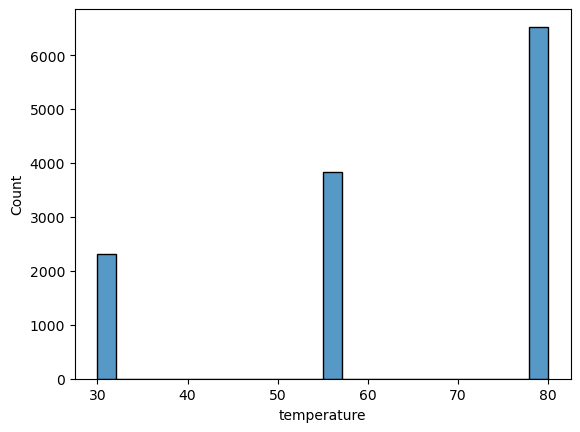

In [174]:
sns.histplot (data= df_cleaned, x = 'temperature')

### Above histogram indicates that this data was gathered in hotter months.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [310]:
#df_cleaned['coupon'].value_counts()
df_bar = df_cleaned.query('coupon == "Bar"')


2. What proportion of bar coupons were accepted?


In [182]:
df_bar.query('Y == 1')['Y'].value_counts()/ len(df_bar) * 100

1    41.001487
Name: Y, dtype: float64

## 41% of total bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [223]:
# Define a custom function to set values based on a condition
def custom_value(bar):
 if (bar in ("never","less1","1~3")):
    return 'less_than_3'
 elif (bar in ("unknown")):
    return 'unknown'
 else:
    return 'greater_than_3'

# Use .apply() to create a new column based on the condition
df_bar['Bar_by_visits'] = df_bar['Bar'].apply(custom_value)

# Display the updated DataFrame
px.histogram(df_bar, x = 'Bar_by_visits',color='Y' )

#df_bar[['Bar_by_visits','Bar']].head(25)


/var/folders/s7/4nk4v10j6pjfy1ks17fk2ht40000gq/T/ipykernel_1393/1420112477.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### From the above histogram we can see that people who went to the bar more than 3 times acepted the coupon at a mich higher percentage. Where as people who went to the bar less number of times accepted the coupons less number of times. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [372]:
df_bar ['age'] = pd.to_numeric(df_bar['age'], errors='coerce') # converting the age column to numberic 

In [405]:
df_bar = df_bar[df_bar['Bar'] != 'unknown'] # dropping the unknown columns as the counts is low ad does not help our analysis.
df_bar = df_bar.rename(columns={'Y': 'Acceptance'}) # renaming the column Y to Acceptance so we can visualize it better, 

fig = px.scatter(df_bar, x='Bar', y='age', title='Scatter Plot', color= 'Acceptance' )
fig.update_yaxes(categoryorder= "category ascending")
fig.add_hline(y=25, line_width=3, line_dash="dash", line_color="green", annotation_text='Reference Line at Age=25')
fig.add_hrect(x0=.275,x1 = 1, y0=25, y1=60, line_width=0, fillcolor="red", opacity=0.2, annotation_text='Plot for Age > 25 and went to bar more then once')
fig.update_layout(title_text="Analysis of bar goers by age and frequency and coupon acceprance")
fig.show()


### The scatterplot above shows the distribution of age vs bar goers per month, we can see that coupon acceptance is lower in in the folks who go to the bar less than one time compared to people who go to the bar more then once and older then 25. We could argue that what happens if the accptance and age combination is the same, histograms from in the analysis aboe show that this intersection is not there exactly.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


### We will be assuming that we are comparing the above criteria in # 5 with others who do not meet the criteria. 

In [363]:
#Filtering the data frame for people who meet our criteriea
df_bar_filtered1 = df_bar.query("Bar not in ('never','less1') and occupation not in ('Farming Fishing & Forestry') and passanger not in ('Kid(s)')")
fig1 = px.histogram(df_bar_filtered1,x = 'Acceptance', color='occupation' )
#Filtering the data frame for people who not not meet our criteriea
df_bar_filtered2 = df_bar.query("Bar  in ('never','less1') and occupation  in ('Farming Fishing & Forestry') and passanger  in ('Kid(s)')")

#Create a histogram to viualize the probality of acceptance.
fig2 = px.histogram(df_bar_filtered2,x = 'occupation', color='Acceptance' )
fig1.update_layout(title_text = "Acceptance of coupons bar goers more then once a month and with passengers without kids")

fig1.show()
fig2.update_layout(title_text = "Acceptance of coupons bar goers less than once a month and with passengers with kids")
fig2.show()

### From the above charts we can see that firstly there are only 3 occurances of people with kids who are driving to a bar and only 1/3 accept the coupon. On the other side people with passengers who are not kids 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [404]:
#Filtering the data frame for people who meet our criteriea 
df_bar_f1 = df_bar.query("Bar not in ('never','less1') and maritalStatus in ('Divorced') and passanger not in ('Kid(s)')")
#df_bar_f1['Acceptance'] = df_bar_f1['Acceptance'].replace({1: 'Yes', 0: 'No'})

fig1 = px.histogram(df_bar_f1,x = 'Acceptance' )

#Filtering the data frame for people who not not meet our criteriea
df_bar_f2 = df_bar.query("Bar  in ('never','less1') and age < 30")

#filtering data for poeple who to to cheap restaurants more then 4 times a months with income less then 50k

df_bar_f3 = df_bar.query("RestaurantLessThan20 not in ('less1','1~3')")

#Create a histogram to viualize the probality of acceptance.
fig2 = px.histogram(df_bar_f2,x = 'Acceptance' )

fig1.update_layout(title_text = "Acceptance of coupons bar goers more then once a month and with passengers without kids and Marital status is Divorced")
fig1.show()

fig2.update_layout(title_text = "Acceptance of coupons bar goers less than once and age less then 30")
fig2.show()

fig3 = px.histogram(df_bar_f3,x = 'Acceptance' )
fig3.update_layout(title_text = "Acceptance of coupons poeple who to to cheap restaurants more then 4 times a months with income less then 50k")
fig3.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Based on the analysis above on bar coupouns we can see that that people who went to the bar more than 3 times acepted the coupon at a mich higher percentage. Where as people who went to the bar less number of times accepted the coupons less number of times. 
## We can also see that coupon acceptance is lower in in the people who go to the bar less than one time compared to people who go to the bar more then once and older then 25. The acceptnce of coupouns is higher with people older then 25 and who visit the bars more ofter.
## From the above charts we can see that firstly there are only 3 occurances of people with kids who are driving to a bar and only 1/3 accept the coupon, which indicates that bar coupouns are not popualr with people driving with kids. In the analysis of people without kids we can see the visits to the bar are much higher and also the coupon acceprance rate is 50% higher. 

## We can also observe that Divorced people who go the bar more then once have a migh higher coupon aceptance rate of 1:5 vs those who do not accept the coupon.
## Income is not playing a big part in the coupon accptance rate for bar goers who visit restautants more often. 
## Younger(<30) people who go to the bar less then once do not accept the coupon that much. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Filtering data for Carry away and take out coupouns for further analysis.

In [435]:
df_carryout_takeaway = df_cleaned.query('coupon == "Carry out & Take away"')
row_as_column_df= df_carryout_takeaway.reset_index()
row_as_column = row_as_column_df.loc[0:0].T
print(row_as_column)
row_as_column_df.head()


                                             0
index                                        2
destination                    No Urgent Place
passanger                            Friend(s)
weather                                  Sunny
temperature                                 80
time                                      10AM
coupon                   Carry out & Take away
expiration                                  2h
gender                                  Female
age                                         21
maritalStatus                Unmarried partner
has_children                                 1
education             Some college - no degree
occupation                          Unemployed
income                         $37500 - $49999
Bar                                      never
CoffeeHouse                              never
CarryAway                              unkonwn
RestaurantLessThan20                       4~8
Restaurant20To50                           1~3
toCoupon_GEQ5

index      destination  passanger weather  temperature  time  \
0      2  No Urgent Place  Friend(s)   Sunny           80  10AM   
1      6  No Urgent Place  Friend(s)   Sunny           55   2PM   
2      8  No Urgent Place     Kid(s)   Sunny           80  10AM   
3     19             Work      Alone   Sunny           80   7AM   
4     25  No Urgent Place  Friend(s)   Sunny           80  10AM   

                  coupon expiration  gender age  ... CoffeeHouse  CarryAway  \
0  Carry out & Take away         2h  Female  21  ...       never    unkonwn   
1  Carry out & Take away         1d  Female  21  ...       never    unkonwn   
2  Carry out & Take away         2h  Female  21  ...       never    unkonwn   
3  Carry out & Take away         2h  Female  21  ...       never    unkonwn   
4  Carry out & Take away         2h    Male  21  ...       less1        4~8   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                  4~8              1~3                1                 1   
1                  4~8              1~3                1                 1   
2                  4~8              1~3                1                 1   
3                  4~8              1~3                1                 0   
4                  4~8            less1                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Y  
0                 0              0             1  1  
1                 0              0             1  1  
2                 0              0             1  1  
3                 0              1             0  1  
4                 0              0             1  0  

[5 rows x 26 columns]

In [449]:
df_carryout_takeaway ['age'] = pd.to_numeric(df_carryout_takeaway['age'], errors='coerce') # converting the age column to numberic 
df_carryout_takeaway['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2393 entries, 2 to 12680
Series name: age
Non-Null Count  Dtype
--------------  -----
2393 non-null   int64
dtypes: int64(1)
memory usage: 37.4 KB


## Visualize how people woth kids respond to take away coupouns

In [467]:
df_carryout_takeaway[['has_children','Y']]
px.histogram(df_carryout_takeaway[['has_children','Y']])


# Define a custom function to set values based on a condition
def acceptance(accepted):
 if (accepted == 0):
    return 'Not Accepted'
 elif (accepted == 1):
    return 'Accpeted'

# Use .apply() to create a new column based on the condition
df_carryout_takeaway = df_carryout_takeaway.reset_index()
df_carryout_takeaway.head()

print(df_carryout_takeaway['Y','Accepted_Coupon'])


index      destination  passanger weather  temperature  time  \
0      2  No Urgent Place  Friend(s)   Sunny           80  10AM   
1      6  No Urgent Place  Friend(s)   Sunny           55   2PM   
2      8  No Urgent Place     Kid(s)   Sunny           80  10AM   
3     19             Work      Alone   Sunny           80   7AM   
4     25  No Urgent Place  Friend(s)   Sunny           80  10AM   

                  coupon expiration  gender  age  ... CarryAway  \
0  Carry out & Take away         2h  Female   21  ...   unkonwn   
1  Carry out & Take away         1d  Female   21  ...   unkonwn   
2  Carry out & Take away         2h  Female   21  ...   unkonwn   
3  Carry out & Take away         2h  Female   21  ...   unkonwn   
4  Carry out & Take away         2h    Male   21  ...       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                   4~8              1~3                1                 1   
1                   4~8              1~3                1                 1   
2                   4~8              1~3                1                 1   
3                   4~8              1~3                1                 0   
4                   4~8            less1                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Y Accepted_Coupon  
0                 0              0             1  1        Accpeted  
1                 0              0             1  1        Accpeted  
2                 0              0             1  1        Accpeted  
3                 0              1             0  1        Accpeted  
4                 0              0             1  0    Not Accepted  

[5 rows x 27 columns]

In [499]:
df_carryout_takeaway .query('Y == 1')['Y'].value_counts()/ len(df_carryout_takeaway) * 100


1    73.547848
Name: Y, dtype: float64

### over all there isa high acceptance rate of the Takeaway coupon with 73%

## Histogram of coupon acceptance for people with children. 

In [484]:

px.histogram(df_carryout_takeaway, x = 'Accepted_Coupon',color= 'has_children', title = "With with children coupon acceptence ")

## We can see that people with children is not conslusive to determine weather some one would accept coupon or not. 

## We will explore with a corellation matrix what are factors that alight with coupon acceptance

/var/folders/s7/4nk4v10j6pjfy1ks17fk2ht40000gq/T/ipykernel_1393/3711703042.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



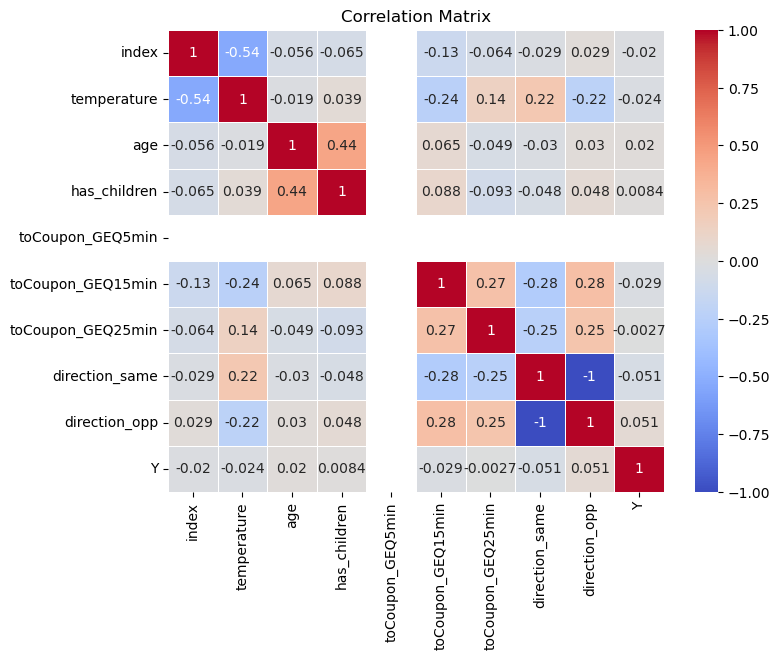

In [486]:

corr_matrix = df_carryout_takeaway.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## It is not very conclusive which features are highly corellated from this matrix. let us explore more with time of day.

In [509]:
px.histogram (df_carryout_takeaway[['time','Accepted_Coupon','destination']], x = 'time' , color= 'Accepted_Coupon', pattern_shape= 'destination')

## 7 AM seems a popular time for coupounds to be accepted towards work and 6 pm and 10 pm people are travelling towrds home and afternoons its no urgent place.

In [508]:
px.histogram (df_carryout_takeaway[['age','Accepted_Coupon','maritalStatus']], x = 'age' , color= 'Accepted_Coupon', pattern_shape='maritalStatus')

## Here we can observe that lof of young singple people are accepting coupons, and > 50 people are accepting coupouns who are marreid with partner. Widowed and Divorced people do not make up much of the populaton.


In [505]:
px.histogram (df_carryout_takeaway[['destination','Accepted_Coupon','has_children']], x = 'destination' , color= 'Accepted_Coupon' , pattern_shape='has_children')

## Above histogram analysis shows that people with out children tend to accept carry out coupouns coupouns.

### Summary of the Carry out coupon analysis and key finginds 
## We can see that the acceptance rate of this coupun is very high at 73%. 
## During the morning hours coupounds are accpepted at a high rate going to work where as coupounds in the evening time are accepted while going home. During the afternoon people going to no significant place are accepting coupouns.
## Children did not play a very high role in the coupon acceptance as with and without accpeted at almos the same rate with slightly higher acceptance with out kids.
## Mostly signle and married with patners are accepting carry away coupouns with signle folks on the younger side and married with partners on the older side. 